In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
pd.set_option('display.max_columns', 50)

In [2]:
# Load data
df = pd.read_csv("Case3HistoricalPrices.csv", index_col=0)

In [3]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,B1,B2,B3,B4,B5,B6,B7,B8,C1,C2,C3,C4,C5,C6,C7,C8
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.355850,98.307641,95.630621,98.296988,98.474008,95.663069,98.342292,98.416837,100.086605,99.685232,100.182851,99.519273,99.588078,100.206999,99.674428,100.131478,95.854652,95.571202,94.085760,93.956485,94.140624,94.058865,95.786959,94.331430
2,96.766305,97.785655,95.211317,97.876191,96.910785,95.299426,97.862363,96.850881,100.595828,99.614514,100.719317,99.342679,99.441200,100.810028,99.463006,100.594669,87.500105,86.517650,88.861746,89.205952,89.255488,89.203200,86.873750,89.644765
3,99.498201,97.762932,95.831525,97.979482,99.992847,95.890271,97.890721,99.523488,100.687197,99.425275,100.866016,99.057339,99.187499,101.028472,99.220046,100.639175,84.500885,83.306741,86.183137,86.617107,86.643905,86.512592,83.788306,87.068357
4,96.259221,92.942010,94.272932,92.958011,96.469517,94.318577,93.007052,96.278064,101.939638,100.099827,102.153804,99.652013,99.888240,102.541910,99.843072,101.823484,79.974708,78.434282,80.585967,81.404902,81.484117,81.131945,79.157682,81.778226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,329.324918,327.820875,203.808926,260.378409,342.877420,111.132121,274.708296,451.631988,149.131001,145.427791,157.907144,161.314628,198.313547,145.665120,100.530046,165.375535,106.282914,86.276494,112.351437,60.020086,123.425175,165.643544,171.456070,93.780064
2516,334.073221,330.906334,207.787122,261.926591,349.049262,108.804145,277.867853,456.440636,149.501434,144.708879,158.618375,160.630917,197.691039,146.250336,100.185788,166.227117,106.881795,85.106488,114.873628,60.399551,124.130673,168.225155,170.370472,91.862923
2517,332.354363,331.906602,207.576958,261.948923,347.811571,107.606915,278.679284,454.381024,149.141392,144.282178,157.180745,160.254969,196.705262,145.539609,100.092463,165.087060,108.188773,86.294104,117.566739,62.847140,127.677820,168.747286,171.004830,91.769657
2518,332.643472,336.647686,208.584529,266.155037,349.749707,103.158349,283.455662,454.103256,149.163525,144.749664,157.051166,160.943483,197.102146,145.611188,100.498559,164.987318,106.744542,85.919175,118.121002,65.073560,130.363044,167.546020,171.666877,93.096859


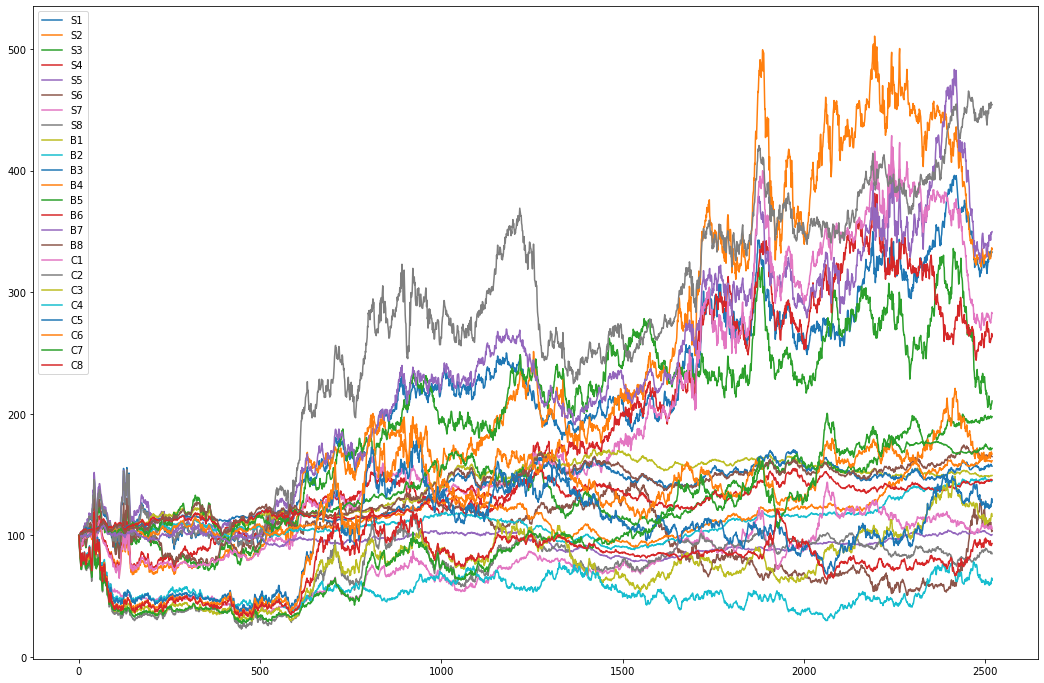

In [4]:
df.plot(figsize=(18, 12))

## Create projections

In [5]:
# Get daily % returns given prices
def make_df(df):
    df['shift']=df[df.columns[0]].shift(1)
    df['PctChg']=(df[df.columns[0]]-df["shift"]).div(df["shift"])*100
    df=df.drop(columns='shift')
    return df

In [6]:
# Generate list of projections
def gen_data(df, first_day, runs, days):
    
    # Create list of arrays with projected daily returns
    data=[]
    first_prices=[]
    for x in range(len(df.columns)):
        temp=make_df(df.iloc[:,x:x+1])
        first_prices.append(temp[temp.columns[0]].iloc[first_day-1])
        data.append(np.random.laplace(loc=temp['PctChg'].mean(), scale=temp['PctChg'].std(), size=(runs, days)))
    
    # Get projected prices by applying % changes
    proj_dfs=[]
    for asset_num in range(len(data)):
        
        asset_data=[]
        for n in range(len(data[asset_num])):
            prices=[first_prices[asset_num]]
            for x in range(len(data[asset_num][n])):
                prices.append(prices[x]*(100+data[asset_num][n][x])/100)
            asset_data.append(prices)
        
        proj_arr=np.array(asset_data)
        proj_df=pd.DataFrame()
        for x in range(proj_arr.shape[0]):
            proj_df[str(x)]=proj_arr[x]
        proj_dfs.append(proj_df)
        
    # Transform dataframes
    dfs=[]
    for run_num in range(proj_dfs[0].shape[1]):
        temp=pd.DataFrame()
        for asset_num in range(len(proj_dfs)):
            prev_df=proj_dfs[asset_num]
            temp[str(asset_num)]=prev_df[prev_df.columns[run_num]]
        dfs.append(temp)
        
    return dfs

## Genetic algorithm

In [7]:
# Define global variable for square root of num trading days in a year
year_num=np.sqrt(252)

In [8]:
def gen_weights(df):
    weights=np.random.randint(0, 100000, len(df.columns))
    weights=weights/sum(weights)
    return weights

In [9]:
def gen_population(num_chrom, df):
    population=[]
    for x in range(num_chrom):
        population.append(gen_weights(df))
    return np.array(population)

In [10]:
def evaluate_chrom(chromosome, dfs):    
    sharpes=[]
    for x in range(len(dfs)):
        temp=dfs[x].multiply(chromosome, axis=1)
        test=temp[list(temp.columns)].sum(axis=1).pct_change()
        sharpe=(test.mean()/test.std())*year_num
        sharpes.append(sharpe)
    return np.mean(sharpes)

In [11]:
def evaluate_population(pop, proj_dfs):
    sharpes=[]
    for chrom in pop:
        sharpes.append(evaluate_chrom(chrom, proj_dfs))
    return np.array(sharpes)

In [12]:
# Choose chromosome for next generation given the cumulataive normalized sharpes
def choose_chrom(population, cum_norm_sharpes):
    for n in range(len(cum_norm_sharpes)):
        if cum_norm_sharpes[n]>np.random.rand(1)[0]:
            return population[n]

In [13]:
def crossover(chrom1, chrom2):
    if np.random.rand(1)[0]>.5:
        return np.concatenate((chrom1[:int(len(chrom1)/2)], chrom2[int(len(chrom1)/2):]), axis=None)
    else:
        return np.concatenate((chrom2[:int(len(chrom1)/2)], chrom1[int(len(chrom1)/2):]), axis=None)

In [14]:
def mutate(chrom, rate):
    new=[]
    for weight in chrom:
        if np.random.rand(1)[0]<rate:
            new_weight=weight*(1+np.random.normal(0, .4, 1)[0])
            if(new_weight<0):
                new.append(0)
            else:
                new.append(new_weight)
        else:
            new.append(weight)
    return np.array(new)

In [15]:
def rebalance(chrom):
    return chrom/sum(chrom)

In [16]:
# Create next generation of chromosomes (weights)
def next_gen(sharpes, population, mutation_rate):
    
    new_gen=[]
    
    # Select best fourth
    num_chosen_direct=round(len(population)/4)
    temp={}
    for x in range(len(sharpes)):
        temp[x]=sharpes[x]
    temp={k: v for k, v in sorted(temp.items(), key=lambda item: item[1])}
    keys=list(temp.keys())[-1*num_chosen_direct:]
    for x in keys:
        new_gen.append(population[x])
    
    # Select rest through crossover: create cumulative norm fitness list
    norm_sharpes=sharpes/sum(sharpes)
    cum_norm_sharpes=[norm_sharpes[0]]
    for n in range(1, len(norm_sharpes)):
        cum_norm_sharpes.append(cum_norm_sharpes[n-1]+norm_sharpes[n])
    for x in range(len(population)-num_chosen_direct):
        new_gen.append(crossover(choose_chrom(population, cum_norm_sharpes), choose_chrom(population, cum_norm_sharpes)))
        
    # Mutation and rebalance
    final=[]
    for x in new_gen:
        final.append(rebalance(mutate(x, mutation_rate)))
        
    return np.array(final)

In [17]:
def genetic_algo(prev_gen_sharpes, prev_gen, pop_size, mutation_rate, df, proj_dfs):
    
    # Add to high fitness weights dict
    max_sharpe=max(prev_gen_sharpes)
    best_weights=prev_gen[list(prev_gen_sharpes).index(max_sharpe)]
    high_fitness_weights[max_sharpe]=best_weights
    
    # Check convergence
    convergence=False
    if (len(high_fitness_weights)==30):
        convergence=True
    elif (len(high_fitness_weights)>1):
        if max_sharpe<list(high_fitness_weights.keys())[-2]*1.02:
            convergence_count.append(1)
        else:
            convergence_count.append(0)

        if (sum(convergence_count[-20:])==20):
            convergence=True
        else:
            convergence=False
    else:
        convergence_count.append(0)
    
    # Recursive GA
    if (convergence==False):
        print("Generation Number "+str(len(convergence_count)+1))
        print("---Processing")
        print("---Sharpe: "+str(max_sharpe))
        new_gen=next_gen(prev_gen_sharpes, prev_gen, mutation_rate)
        new_gen_sharpes=evaluate_population(new_gen, proj_dfs)
        print("---Done")
        genetic_algo(new_gen_sharpes, new_gen, pop_size, mutation_rate, df, proj_dfs)
    else:
        print("Convergence achieved")

## Test algorithm

In [18]:
# Create projections
proj_dfs=gen_data(df, first_day = 2520-30, runs = 50, days = 30)

C:\Users\Arjun\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arjun\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


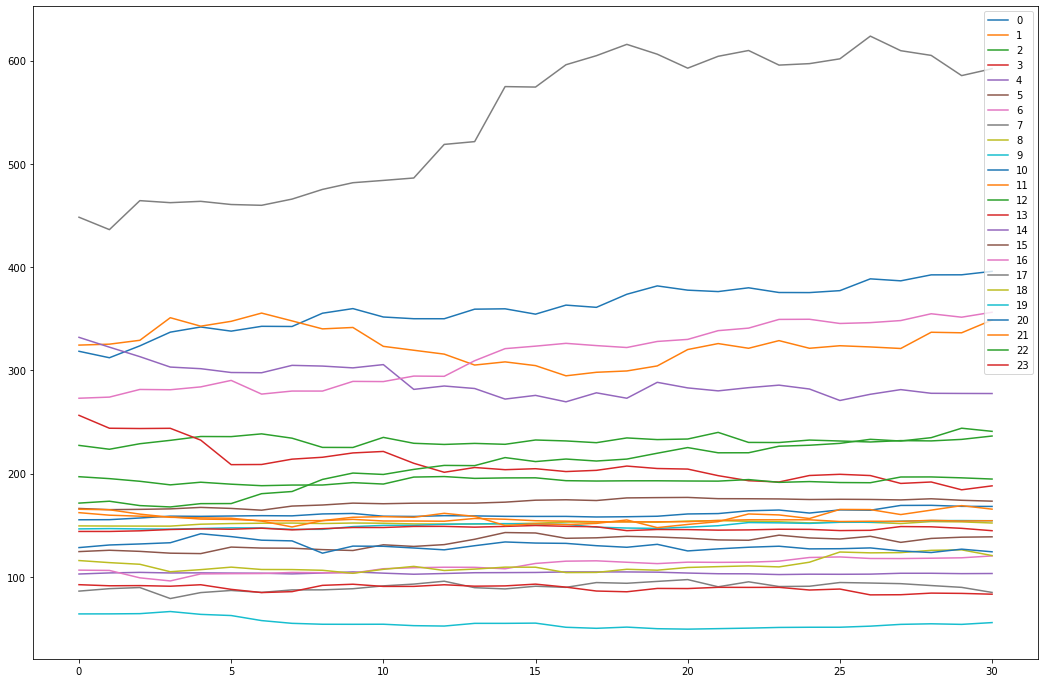

In [19]:
# Plot one set of projections
proj_dfs[0].plot(figsize=(18, 12))

In [20]:
# Define GA inputs
pop_size=25; mutation_rate=.5;

In [21]:
# Create initial population and evaluate
gen1=gen_population(pop_size, df);

In [22]:
# Run GA
sharpes=evaluate_population(gen1, proj_dfs)
high_fitness_weights={}
convergence_count=[]
genetic_algo(sharpes, gen1, pop_size, mutation_rate, df, proj_dfs)

Generation Number 2
---Processing
---Sharpe: 1.5497618523888144
---Done
Generation Number 3
---Processing
---Sharpe: 1.6004735184005852
---Done
Generation Number 4
---Processing
---Sharpe: 1.6700474470881193
---Done
Generation Number 5
---Processing
---Sharpe: 1.6182330440027985
---Done
Generation Number 6
---Processing
---Sharpe: 1.6639946449588683
---Done
Generation Number 7
---Processing
---Sharpe: 1.6127498738133972
---Done
Generation Number 8
---Processing
---Sharpe: 1.6642502873334555
---Done
Generation Number 9
---Processing
---Sharpe: 1.7790188604634198
---Done
Generation Number 10
---Processing
---Sharpe: 1.718750288455782
---Done
Generation Number 11
---Processing
---Sharpe: 1.7650075836087507
---Done
Generation Number 12
---Processing
---Sharpe: 1.814735300049361
---Done
Generation Number 13
---Processing
---Sharpe: 1.8393398279014124
---Done
Generation Number 14
---Processing
---Sharpe: 1.8239293843804965
---Done
Generation Number 15
---Processing
---Sharpe: 1.8210103724890

In [23]:
max_sharpe=max(list(high_fitness_weights.items()))[0]
best_weights=max(list(high_fitness_weights.items()))[1]
print("Max Sharpe: "+str(max_sharpe))
print("Associated Weights: "+str(best_weights))

Max Sharpe: 2.1451965525399546
Associated Weights: [0.0036616  0.         0.00593648 0.0318388  0.001865   0.
 0.00591236 0.00280226 0.28279672 0.31848068 0.00003165 0.02105982
 0.00178042 0.00487233 0.02738683 0.16119063 0.00124955 0.00011451
 0.07946182 0.00204337 0.00063631 0.04198785 0.00148561 0.00340541]
